In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os
import datetime


In [2]:
def loss(target, prediction):
    if np.isnan(target).all() or np.isnan(prediction).all():
        return 0, 0, 0, 0
    from math import sqrt
    error = []
    pError = []
    for i in range(len(target)):
        error.append(target[i] - prediction[i])
        
        # if target[i] < 55:
        #     a = 55
        # else:
        #     a = target[i]
        # if prediction[i] < 55:
        #     b = 55
        # else:
        #     b = prediction[i]
        pError.append(abs(target[i] - prediction[i]) / ((abs(target[i]) + abs(prediction[i]))/2))

    squaredError = []
    absError = []
    for val in error:
        squaredError.append(val * val)#target-prediction之差平方 
        absError.append(abs(val))#误差绝对值
    mse = sum(squaredError) / len(squaredError)#均方误差MSE
    rmse = sqrt(sum(squaredError) / len(squaredError))#均方根误差RMSE
    mae = sum(absError) / len(absError)#平均绝对误差MAE
    smape = sum(pError) / len(absError)
    return mse, rmse, mae, smape


In [2]:
def gap_invariance(data, tgt_date):
    tgt_date = pd.to_datetime(tgt_date).date()
    tgt_date_mask = data['date'].dt.date == tgt_date
    data.loc[tgt_date_mask, 'total_load2'] += 1000
    data.loc[tgt_date_mask, 'pre_new_energy_output2'] += 1000
    
    return data

def load_rate_invariance(data, tgt_date):
    tgt_date = pd.to_datetime(tgt_date).date()
    tgt_date_mask = data['date'].dt.date == tgt_date
    data.loc[tgt_date_mask, 'total_load2'] *= 1.1
    data.loc[tgt_date_mask, 'pre_new_energy_output2'] *= 1.1
    data.loc[tgt_date_mask, 'day_ahead_thermal_power_capacity2'] *= 1.1
    
    return data

In [3]:
def test(data, tgt_date):
    tgt_date = pd.to_datetime(tgt_date).date()
    tgt_date_mask = data['date'].dt.date == tgt_date
    data.loc[tgt_date_mask, 'total_load2'] = 1
    data.loc[tgt_date_mask, 'pre_new_energy_output2'] = 10
    data.loc[tgt_date_mask, 'day_ahead_thermal_power_capacity2'] = 10
    data.loc[tgt_date_mask, 'dayahead_price1'] = 10
    data.loc[tgt_date_mask, 'day_ahead_thermal_power_capacity2'] = 10
    
    return data

In [3]:
def gap_decline(data, tgt_date):
    tgt_date = pd.to_datetime(tgt_date).date()
    tgt_date_mask = data['date'].dt.date == tgt_date
    gap = data.loc[tgt_date_mask, 'total_load2'].values[0] - data.loc[tgt_date_mask, 'pre_new_energy_output2'].values[0]
    data.loc[tgt_date_mask, 'total_load2'] -= gap / 2
    
    return data

In [74]:
def price_decline(data, tgt_date):
    tgt_date = pd.to_datetime(tgt_date).date() - datetime.timedelta(days=1)
    tgt_date_mask = data['date'].dt.date == tgt_date
    data.loc[tgt_date_mask, 'dayahead_price1'] *= 0.5
    
    return data

In [4]:
def gap_zero(data, tgt_date):
    tgt_date = pd.to_datetime(tgt_date).date()
    tgt_date_mask = data['date'].dt.date == tgt_date
    data.loc[tgt_date_mask, 'total_load2'] = 0
    data.loc[tgt_date_mask, 'pre_new_energy_output2'] = 0
    
    return data

In [87]:
# read E:\day-ahead price\Code\Time-Series-Library-main\Time-Series-Library-main\data/shanxi_elec.csv
data = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Time-Series-Library-main\data/shanxi_elec.csv')
data['date'] = pd.to_datetime(data['date'])
data[data['date'].dt.date == pd.to_datetime('2024-01-15').date()]

,date,dayahead_price,total_load,total_load1,total_load2,pre_new_energy_output,pre_new_energy_output1,pre_new_energy_output2,day_ahead_thermal_power_capacity,day_ahead_thermal_power_capacity1,day_ahead_thermal_power_capacity2,dayahead_price1
28319,2024-01-15 00:00:00,350.00,38833.7,38833.7,38833.7,1604.52,2029.56,2237.09,50741.0,47273,49137.703125,359.00
28320,2024-01-15 00:15:00,340.00,39310.3,39310.3,39310.3,1692.95,1898.38,1632.50,50606.0,47246,49269.296875,380.00
28321,2024-01-15 00:30:00,360.36,39196.9,39196.9,39196.9,1709.80,1860.33,1627.96,50606.0,47246,49269.296875,369.00
28322,2024-01-15 00:45:00,359.00,38983.5,38983.5,38983.5,1726.66,1823.10,1632.58,50606.0,47246,49269.296875,365.00
28323,2024-01-15 01:00:00,379.00,38777.7,38777.7,38777.7,1811.56,1786.62,1637.12,50606.0,47246,49269.296875,369.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28410,2024-01-15 22:45:00,380.00,40739.9,40739.9,40739.9,1374.83,1639.23,894.80,50606.0,47246,49269.296875,398.40
28411,2024-01-15 23:00:00,380.00,39939.1,39939.1,39939.1,1370.79,1638.29,910.26,50606.0,47246,49269.296875,374.36
28412,2024-01-15 23:15:00,379.00,39980.0,39980.0,39980.0,1394.08,1631.51,919.43,50606.0,47246,49269.296875,380.00
28413,2024-01-15 23:30:00,368.00,39704.4,39704.4,39704.4,1378.89,1618.98,933.71,50606.0,47246,49269.296875,374.36


In [88]:
# data = gap_invariance(data, '2024-01-13')
# data = load_rate_invariance(data, '2024-01-15')
# data = test(data, '2024-01-13')
# data = test(data, '2024-01-14')
# data = test(data, '2024-01-15')
# data = test(data, '2024-01-16')
# data = test(data, '2024-01-17')
data = gap_zero(data, '2024-01-15')
data[data['date'].dt.date == pd.to_datetime('2024-01-15').date()]

,date,dayahead_price,total_load,total_load1,total_load2,pre_new_energy_output,pre_new_energy_output1,pre_new_energy_output2,day_ahead_thermal_power_capacity,day_ahead_thermal_power_capacity1,day_ahead_thermal_power_capacity2,dayahead_price1
28319,2024-01-15 00:00:00,350.00,38833.7,38833.7,0.0,1604.52,2029.56,0.0,50741.0,47273,49137.703125,359.00
28320,2024-01-15 00:15:00,340.00,39310.3,39310.3,0.0,1692.95,1898.38,0.0,50606.0,47246,49269.296875,380.00
28321,2024-01-15 00:30:00,360.36,39196.9,39196.9,0.0,1709.80,1860.33,0.0,50606.0,47246,49269.296875,369.00
28322,2024-01-15 00:45:00,359.00,38983.5,38983.5,0.0,1726.66,1823.10,0.0,50606.0,47246,49269.296875,365.00
28323,2024-01-15 01:00:00,379.00,38777.7,38777.7,0.0,1811.56,1786.62,0.0,50606.0,47246,49269.296875,369.00
...,...,...,...,...,...,...,...,...,...,...,...,...
28410,2024-01-15 22:45:00,380.00,40739.9,40739.9,0.0,1374.83,1639.23,0.0,50606.0,47246,49269.296875,398.40
28411,2024-01-15 23:00:00,380.00,39939.1,39939.1,0.0,1370.79,1638.29,0.0,50606.0,47246,49269.296875,374.36
28412,2024-01-15 23:15:00,379.00,39980.0,39980.0,0.0,1394.08,1631.51,0.0,50606.0,47246,49269.296875,380.00
28413,2024-01-15 23:30:00,368.00,39704.4,39704.4,0.0,1378.89,1618.98,0.0,50606.0,47246,49269.296875,374.36


In [89]:
# data.to_csv('E:\day-ahead price\Code\Time-Series-Library-main\Time-Series-Library-main\data/shanxi_elec.csv', index=False)

In [5]:
date_list =[]
mae_list = []
smape_list = []

with open('E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi iTransformer/result_long_term_forecast.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()  # 读取所有行
    for i in range(len(lines)):
        line = lines[i].strip()  # 去除文本中的换行符
        index = line.find('2023-')  # 查找'2023-'在每一行中的位置
        if index == -1:
            index = line.find('2024-')
        index_dataset = line.find('shanxi')
        index_model = line.find('iTransformer')
        if index_dataset != -1 and index_model != -1:
            if index != -1:  # 如果找到了'2023-'
                result = line[index:index+10]  # 记录'2023-'及其后面的5个字符
                date_list.append(pd.to_datetime(result))
                if i+1 < len(lines):  # 如果存在下一行
                    next_line = lines[i+1].strip()  # 获取下一行内容
                    numbers = re.findall(r'\d+\.\d+|\d+', next_line)  # 使用正则表达式找出所有的数字，包括整数和小数
                    float_numbers = [float(num) for num in numbers]  # 将字符串转换为浮点数
                    mae_list.append(float_numbers[1])
                    smape_list.append(float_numbers[2])
df_result = pd.DataFrame({'date': date_list, 'mae': mae_list, 'smape': smape_list})
df_result.sort_values(by='date', inplace=True)
df_result.drop_duplicates(subset='date', keep='first', inplace=True)
# df_result = df_result[df_result['date'] >= pd.to_datetime('2023-04-01')]
df_result

,date,mae,smape
0,2023-11-01,71.072975,0.371504
1,2023-11-02,68.762291,0.579765
2,2023-11-03,70.909447,0.363198
3,2023-11-04,68.398354,0.228144
4,2023-11-05,112.306854,0.637513
...,...,...,...
148,2024-03-28,68.159523,0.597765
149,2024-03-29,91.831581,0.534092
150,2024-03-30,47.515682,0.366791
151,2024-03-31,63.559418,0.456691


In [6]:
df_result[df_result['mae'] < 50]

,date,mae,smape
74,2024-01-14,48.498520,0.295681
75,2024-01-15,47.121365,0.156328
76,2024-01-16,40.760395,0.093296
131,2024-03-11,47.572021,0.421608
136,2024-03-16,47.248142,0.335566
141,2024-03-21,42.447582,0.277501
142,2024-03-22,48.596684,0.388897
143,2024-03-23,46.626801,0.159301
144,2024-03-24,47.663097,0.135039
145,2024-03-25,46.810543,0.126335


In [3]:
# load prediction data from E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi iTransformer\results
# read prediced power
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\shanxi iTransformer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi iTransformer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred = pd.DataFrame(pred_list, index=date_list)
df_true = pd.DataFrame(true_list, index=date_list)
df_pred


,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2023-04-01,378.630920,349.177307,331.690765,345.370270,315.479187,338.400940,377.452026,322.406464,311.170624,334.455109,...,416.052704,442.201569,443.316864,353.954895,384.225403,362.755829,381.538544,392.265900,381.947388,337.445923
2023-04-02,361.818451,307.930176,313.021790,304.029205,329.262054,324.519104,342.746307,333.393646,348.433960,281.697327,...,425.256927,418.019318,411.067566,333.586243,366.323181,380.534943,392.896851,319.069000,362.081299,292.873779
2023-04-03,308.688416,293.326843,316.188141,283.680511,286.289459,327.763275,290.961945,326.788910,290.928741,285.946350,...,384.795380,416.942810,373.925079,334.314941,370.679871,379.824463,336.865326,337.232483,381.047760,304.755157
2023-04-04,279.736664,315.839478,277.186157,323.993591,330.368713,298.378540,325.985016,354.931244,322.505951,316.593933,...,396.700897,341.986572,365.833679,299.477295,380.129150,327.372009,304.730072,338.013855,332.723480,310.214386
2023-04-05,380.722717,380.055359,348.007263,348.637909,337.792572,365.655914,357.717316,399.617645,363.488708,382.044983,...,427.021149,446.564819,423.358643,429.861938,425.678925,442.205780,381.680450,404.538818,426.886505,414.460205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,244.819336,232.191910,238.908813,216.452072,229.826385,230.762833,229.702591,226.602783,220.174881,226.178543,...,259.407104,241.904022,239.870895,244.921921,250.559723,236.759369,237.992157,232.973114,234.614105,231.345856
2024-03-29,177.083832,178.199631,192.750809,192.146530,204.480469,191.926041,190.692322,204.299820,193.774689,205.157028,...,239.597137,207.374146,217.697540,209.911819,209.923843,196.434128,199.729065,181.639618,179.044357,188.260788
2024-03-30,296.119354,285.894440,301.806610,297.955109,312.673981,303.266205,300.167816,303.724457,283.618988,317.962463,...,301.805908,295.320984,293.759003,279.692902,283.533875,263.955902,287.847290,267.066650,266.926971,268.548553
2024-03-31,263.907257,266.700562,255.718445,250.631363,261.271393,256.765320,272.934875,259.902924,272.180176,287.247925,...,380.482941,372.684357,349.673767,358.484528,338.601074,333.756805,331.438019,326.046661,317.716278,317.885925


In [4]:
path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\add_bias_exp_shanxi_iTransformer\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred_ab = pd.DataFrame(tmp, index=date_tmp)
df_pred_ab

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-15,355.237885,341.706543,344.766754,338.334534,341.730682,339.374908,342.76059,326.519989,337.214813,331.301758,...,357.49118,355.128052,347.134369,349.388062,318.029999,296.46283,322.054779,314.300781,292.391357,298.177643


In [5]:
path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\chg_his_prz_exp_shanxi_iTransformer\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred_ch = pd.DataFrame(tmp, index=date_tmp)
df_pred_ch

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-15,336.663269,323.821777,325.051605,320.621063,323.259155,324.869568,325.244293,312.182556,324.926788,317.717743,...,360.031647,356.660217,347.562988,352.739349,318.724091,295.707855,320.891479,312.143951,291.645691,298.575012


In [6]:
path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\gap_zero_exp_shanxi_iTransformer\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred_gz = pd.DataFrame(tmp, index=date_tmp)
df_pred_gz

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-01,408.176086,376.170868,324.581879,292.671570,321.341492,306.716736,320.419281,305.551666,327.113251,254.695236,...,480.931641,402.160492,386.104431,442.299927,336.158264,339.562531,370.539276,362.688110,239.429443,337.314423
2024-01-02,246.138474,251.371933,216.247665,200.744446,280.448059,147.013214,213.157730,149.211121,162.066925,160.029297,...,523.242798,512.854248,408.648956,476.862671,398.250885,424.325439,355.957642,443.983337,424.735352,486.134033
2024-01-03,325.115723,353.914154,315.548828,281.832031,280.007996,320.388214,295.653229,338.429718,332.773621,276.299408,...,682.309570,555.099670,551.001587,615.474060,635.219299,571.871704,552.296204,487.489410,422.477722,517.517639
2024-01-04,265.062927,243.798203,259.733002,252.961639,274.202911,223.700470,258.731903,229.004440,214.147995,176.763611,...,417.967712,487.351074,402.720032,485.136444,406.116791,349.665131,368.224609,357.575439,339.198334,336.478333
2024-01-05,379.046967,321.179718,311.181213,313.960663,337.865051,258.385437,308.739990,273.071228,282.409363,263.468140,...,428.818024,405.980438,419.922974,411.884827,407.922302,347.672974,366.378052,335.765747,359.563324,346.670288
2024-01-06,265.777771,303.891998,248.421890,263.184692,256.540710,251.316620,249.762161,245.232605,238.976227,246.665222,...,404.902008,361.685333,360.326202,352.683777,323.565460,328.000763,289.674774,303.071228,303.912567,286.161591
2024-01-07,360.650208,358.163513,345.015961,345.399963,348.638397,335.366638,356.106262,306.806030,347.051636,317.937012,...,372.938873,385.346802,373.171844,386.698303,349.657776,341.418182,349.975525,315.986145,305.695435,310.862976
2024-01-08,275.040344,293.414551,242.143906,254.513626,250.434799,221.570160,251.468521,216.522903,226.838028,222.017288,...,330.105194,312.176147,332.747894,295.378265,279.288391,252.406662,273.342865,253.969391,264.975342,250.999908
2024-01-09,297.786957,276.082886,288.683258,271.720154,271.553711,261.476715,289.689362,250.043411,270.706146,259.291992,...,440.387299,434.673798,435.895844,414.475037,387.302826,362.371277,379.851685,358.246582,363.328003,367.265625
2024-01-10,343.797028,354.516388,321.252777,342.250397,342.705566,336.819305,330.630646,337.882050,332.207825,333.906555,...,331.173401,310.623138,354.192139,328.711945,315.776520,290.787567,279.714600,285.905762,240.102844,263.214752


In [7]:
path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\double_demand_exp_shanxi_iTransformer\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred_dd = pd.DataFrame(tmp, index=date_tmp)
df_pred_dd

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-01,354.958832,317.927429,252.385956,241.325775,263.030640,263.567169,246.573853,236.734558,267.728058,190.228241,...,450.214142,367.142334,341.817963,403.017303,300.351227,320.158386,317.188721,332.419769,232.942841,296.140472
2024-01-02,218.835724,235.205521,191.505646,185.695312,264.586517,130.673248,178.269409,130.122879,126.194107,146.032166,...,477.330994,448.636719,350.435120,405.752319,357.152954,378.110809,312.414825,402.227448,404.210297,421.214020
2024-01-03,324.848969,357.164215,301.186768,277.369904,274.991852,330.858978,292.788239,326.681305,318.550446,294.693542,...,671.834412,529.695862,539.756470,591.474060,631.762024,579.001587,535.813660,488.742004,436.884521,494.973785
2024-01-04,223.318024,215.785095,223.197403,210.093262,239.284042,198.403046,214.674805,191.873215,179.987274,151.683960,...,358.119049,417.598083,330.668823,406.345612,347.532745,301.997345,305.584839,309.662476,312.072693,280.649109
2024-01-05,358.813385,312.393341,302.210602,295.628754,326.389679,237.111328,286.613220,249.984970,256.309692,245.158600,...,426.151428,404.795776,423.487976,409.394684,411.433014,338.764130,368.792572,335.347168,365.354370,342.006714
2024-01-06,248.781494,290.919922,233.370850,245.398300,245.312042,244.837891,234.050354,235.285904,231.805496,240.315247,...,391.851196,342.515961,349.675812,339.812103,307.004730,314.945129,276.324310,287.423340,300.919922,277.487457
2024-01-07,348.778503,353.179657,338.118011,330.699310,343.814148,330.121277,339.900543,299.163727,333.509705,305.267029,...,361.797089,374.686249,367.800934,376.539764,340.333710,328.184937,343.061737,303.800385,301.613129,304.160217
2024-01-08,261.095428,280.834076,229.964340,239.304108,243.284729,212.180389,240.044235,204.798141,213.020142,211.946777,...,316.351593,300.853699,318.898071,277.529968,267.029388,235.885818,257.666321,241.276642,256.183105,233.569733
2024-01-09,283.140747,269.087646,282.151642,271.526306,270.403046,255.636993,284.510834,239.615524,265.318634,257.304352,...,450.252045,436.911621,441.524994,423.086548,393.000488,370.053925,385.220673,367.219666,378.706512,369.119019
2024-01-10,331.616241,346.237640,309.660187,334.132050,339.874969,328.296204,322.534302,326.731873,320.983704,330.502014,...,326.872253,303.643188,348.411621,321.149658,312.058044,283.448425,273.319427,285.196259,237.889236,251.435013


In [8]:
mae_list = []
smape_list = []
date_list = []

for _ in pd.date_range(start='2024-01-01', end='2024-01-31', freq='D'):
    _ = _.strftime('%Y-%m-%d')
    original = df_pred.loc[_, :].values
    pred_dd = df_pred_dd.loc[_, :].values
    mae, rmse, mape, smape = loss(original, pred_dd)
    mae_list.append(mae)
    smape_list.append(smape)
    date_list.append(_)
df_result_compare = pd.DataFrame({'date': date_list, 'mae': mae_list, 'smape': smape_list})
df_result_compare

,date,mae,smape
0,2024-01-01,5568.054107,0.305777
1,2024-01-02,4461.539313,0.425160
2,2024-01-03,612.306673,0.067342
3,2024-01-04,537.276449,0.288805
4,2024-01-05,103.592781,0.026944
5,2024-01-06,252.871802,0.059065
6,2024-01-07,27.228821,0.013627
7,2024-01-08,64.489761,0.037955
8,2024-01-09,44.677033,0.016080
9,2024-01-10,12.341901,0.010017


In [9]:
df_result_compare['smape'].mean()

0.07335973842153569

In [10]:
# load prediction data from E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi crossformer\results
# read prediced power
path1 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results\shanxi crossformer\results'
os.chdir(path1)
files = os.listdir(path1)
date_tmp1 = []
tmp1 = []
true1 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path1, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp1.append(date)
    tmp1.append(pred_price)
    true1.append(true_price)
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi crossformer\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp1 + tmp2
date_list = date_tmp1 + date_tmp2
true_list = true1 + true2
df_pred1 = pd.DataFrame(pred_list, index=date_list)
df_pred1

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2023-04-01,367.151459,375.304382,368.446777,365.193848,371.541229,369.940216,358.701416,357.380280,366.198212,364.750336,...,370.926208,368.461334,374.622589,374.339050,365.423279,361.076569,373.377777,371.219238,368.215851,366.904633
2023-04-02,350.407501,356.513702,354.413147,348.073853,348.904938,348.843445,343.886169,338.799866,342.449036,348.890900,...,362.740143,357.551025,364.939423,364.039734,351.805084,351.165314,354.285522,349.537842,345.119843,347.917603
2023-04-03,392.236206,402.729492,397.132263,395.485077,400.057831,396.678925,389.404510,396.924103,399.085205,394.672028,...,396.617371,390.311249,408.538635,404.558197,392.346924,402.471954,404.464111,398.482513,396.843140,396.963257
2023-04-04,382.938995,397.289825,367.445679,374.066345,374.302063,395.129913,376.240509,386.676483,389.402924,376.354187,...,356.628998,375.435669,375.105621,385.813110,375.178925,385.274475,393.226685,387.965485,388.987518,380.226990
2023-04-05,489.340515,494.845062,489.269775,499.693054,476.825500,485.583740,502.786957,515.883606,491.900421,494.773773,...,481.768860,516.205261,455.503967,500.235229,518.093201,512.416382,512.362488,506.645691,506.166931,487.496857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-28,193.569412,206.426193,197.546997,206.827332,214.940277,205.275238,207.049576,206.601776,218.260345,209.098068,...,215.773727,200.952209,218.352997,208.248032,203.279816,194.402451,194.793289,193.887436,193.322830,186.634094
2024-03-29,173.290604,174.041901,178.731476,186.868210,197.586258,191.842514,198.215546,192.850647,207.647888,214.041351,...,321.891876,326.992371,327.329224,316.925842,316.114014,311.036346,304.153656,298.387390,293.774078,292.595001
2024-03-30,308.195312,308.080994,313.063995,313.214996,312.449524,318.517303,308.477020,316.153992,304.231140,315.361786,...,326.875702,328.850250,318.772095,314.558258,308.517456,300.141724,289.560150,286.458801,277.684143,268.432770
2024-03-31,237.702728,234.682465,235.921127,239.860321,249.438736,244.927795,245.767441,246.174347,244.580780,241.709900,...,361.174347,362.416809,361.571777,348.359344,342.454865,331.830841,323.780609,325.685272,315.098999,311.204834


In [11]:
path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\gap_zero_exp_shanxi_crossformer\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred1_gz = pd.DataFrame(tmp, index=date_tmp)
df_pred1_gz

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-01,369.610870,372.571472,368.762115,378.970764,374.065277,374.058960,385.362610,372.515320,374.425140,375.405121,...,342.585510,341.907501,323.507782,312.595764,315.413513,286.231720,305.112915,271.862671,245.855072,247.594315
2024-01-02,239.874298,246.125687,241.429230,230.391861,238.096161,224.706726,230.741287,213.265869,230.459869,220.940735,...,249.641510,241.251862,227.842850,233.568115,229.424957,209.158600,221.261307,204.428787,192.113464,181.478897
2024-01-03,286.943909,301.766907,290.435547,279.185181,282.473877,279.571564,278.612274,272.603912,282.657623,265.886139,...,404.254028,401.679230,378.378754,376.110107,365.332855,348.049316,346.815063,312.422821,306.154297,302.638855
2024-01-04,96.473198,82.976723,96.047035,93.266060,91.534325,74.800575,67.702522,89.461800,85.094749,94.107536,...,252.908157,244.708755,224.867264,210.246201,209.460220,188.446396,191.318558,194.192642,168.906860,165.626999
2024-01-05,364.513184,362.160004,350.409943,332.187317,340.815765,321.924500,312.098633,317.199371,319.244934,303.594757,...,329.431000,333.805176,320.480011,316.636017,319.121246,301.651642,313.191254,294.525452,279.199860,279.254974
2024-01-06,283.647339,289.370392,277.791565,274.138062,283.012329,282.455688,271.741669,277.116608,291.024658,281.820648,...,415.209412,410.788269,403.709320,397.553558,402.147217,387.284698,387.560181,379.787140,370.783508,372.973022
2024-01-07,358.494781,363.585571,354.299896,340.829193,352.583527,336.109222,345.947723,335.719788,339.038025,327.426605,...,379.720825,376.886444,365.218323,354.221039,359.960968,345.770599,349.879211,321.749329,305.830505,305.426788
2024-01-08,293.142883,303.181732,291.068115,286.062317,299.657318,302.575348,299.021545,303.889679,314.093353,308.805267,...,284.570038,273.885223,258.515625,238.625015,252.589142,229.015152,234.404892,216.711578,207.728241,204.440460
2024-01-09,299.502991,294.560608,280.359497,267.281464,280.544373,262.851990,255.889038,262.441406,280.190491,270.890594,...,386.335266,381.159790,367.871887,357.241272,366.102173,351.068939,350.743774,338.600494,342.055695,329.926758
2024-01-10,369.097260,378.259796,362.969696,364.759796,356.718750,364.559509,358.591827,375.845978,373.645630,376.657288,...,260.000488,254.627548,226.159012,227.049728,227.227219,204.648727,209.272415,189.474426,176.424301,179.387207


In [12]:

path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\double_demand_exp_shanxi_Crossformer\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred1_dd = pd.DataFrame(tmp, index=date_tmp)
df_pred1_dd

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-01,374.677124,374.174835,377.190521,378.579926,380.692078,369.722260,381.012970,369.680206,374.060730,373.031769,...,283.442535,281.916840,265.829773,261.386078,263.138062,240.807373,253.699493,237.686630,209.887390,208.982819
2024-01-02,172.530853,173.597137,173.624817,155.859665,170.096176,147.918549,151.233810,133.316315,150.372269,140.294769,...,179.295425,176.334625,156.547516,166.172012,160.899323,139.157639,152.004532,135.106613,123.204010,112.664276
2024-01-03,225.001892,235.207581,223.581497,207.416199,216.915131,202.104126,198.841019,193.055588,204.818161,182.552399,...,333.562225,323.397461,317.256256,306.141571,293.889069,275.101410,284.944824,252.660263,244.788773,240.733017
2024-01-04,115.398720,100.653801,113.654976,110.243217,112.042320,91.905540,86.022957,103.037636,107.422661,113.165260,...,271.102875,260.590790,247.345047,230.997833,228.215576,205.457626,211.953491,214.233368,189.381302,186.307953
2024-01-05,317.916748,317.752960,306.419708,285.735718,294.531250,274.376343,263.904419,267.788666,271.149811,249.553970,...,267.406891,272.499512,258.586365,254.249573,259.696594,237.180222,254.465118,234.667480,220.010117,220.438065
2024-01-06,265.176819,268.197632,252.742905,247.260696,259.420868,253.313187,240.706329,244.989426,262.643280,251.807846,...,385.566254,385.093323,371.691162,369.176361,376.489624,355.935638,358.223267,349.949463,339.225433,343.659515
2024-01-07,330.648285,337.421844,328.080566,313.369232,328.418457,309.783203,314.958282,306.879822,313.487335,300.489044,...,305.429047,308.015961,295.886017,287.450378,293.452545,271.837769,284.494263,253.418243,235.850922,236.841278
2024-01-08,269.138977,275.922241,264.460999,252.650681,270.366699,267.014252,262.011108,267.560913,282.124420,270.057373,...,287.032501,279.747742,258.920746,243.548172,254.393875,230.389999,237.573074,222.899826,212.654236,209.838882
2024-01-09,272.053925,267.367096,251.757507,236.056656,250.992783,228.373444,221.913055,225.545929,245.406708,233.261292,...,370.132111,361.746307,350.240540,336.750671,346.122955,326.888458,331.077240,313.920776,319.094177,308.060791
2024-01-10,353.043213,357.794769,347.118134,340.703583,339.167725,343.694763,333.464661,357.093994,358.009125,354.630280,...,210.088730,207.681122,182.170166,183.764526,182.206421,163.723038,172.139694,154.557297,143.277802,151.016006


In [13]:
mae_list = []
smape_list = []
date_list = []

for _ in pd.date_range(start='2024-01-01', end='2024-01-31', freq='D'):
    _ = _.strftime('%Y-%m-%d')
    original = df_pred1.loc[_, :].values
    pred_dd = df_pred1_dd.loc[_, :].values
    mae, rmse, mape, smape = loss(original, pred_dd)
    mae_list.append(mae)
    smape_list.append(smape)
    date_list.append(_)
df_result_compare = pd.DataFrame({'date': date_list, 'mae': mae_list, 'smape': smape_list})
df_result_compare

,date,mae,smape
0,2024-01-01,173.061796,0.048210
1,2024-01-02,343.560492,0.322500
2,2024-01-03,379.787327,0.100220
3,2024-01-04,3.960841,0.010539
4,2024-01-05,1360.694424,0.155469
5,2024-01-06,338.309859,0.064700
6,2024-01-07,1406.509286,0.120514
7,2024-01-08,335.339625,0.088908
8,2024-01-09,320.195148,0.074971
9,2024-01-10,195.888930,0.068717


In [14]:
df_result_compare['smape'].mean()

0.07830611263475622

In [15]:
path2 = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\shanxi DNN\results'
os.chdir(path2)
files = os.listdir(path2)
date_tmp2 = []
tmp2 = []
true2 = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path2, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()
    date_tmp2.append(date)
    tmp2.append(pred_price)
    true2.append(true_price)

pred_list = tmp2
date_list = date_tmp2
true_list = true2
df_pred2 = pd.DataFrame(pred_list, index=date_list)
df_pred2

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2023-11-01,287.644165,298.831390,299.021851,295.322327,305.740143,311.832855,309.825745,293.517334,310.725403,329.165344,...,398.716980,408.775208,386.573456,364.737610,361.011444,344.787720,330.836060,334.681549,312.018982,331.378693
2023-11-02,325.871002,336.630402,347.033020,301.320740,336.913757,282.569855,292.907104,308.272430,285.108002,306.799774,...,200.643494,188.012970,172.355408,189.253632,145.356766,155.441223,171.219070,168.322433,167.374817,147.969193
2023-11-03,270.520416,297.533234,304.446472,302.911835,327.441132,294.629547,285.441010,307.115326,320.495300,300.761810,...,452.037170,424.975952,432.706024,418.329773,407.941956,405.058685,394.847198,379.236481,398.758026,385.149689
2023-11-04,288.747925,322.842163,323.917908,305.224823,341.548462,337.029175,333.804871,313.385895,350.844055,349.563843,...,357.328522,342.566101,333.465485,356.492310,337.288086,320.480438,336.324005,334.346954,326.459106,361.333099
2023-11-05,360.809662,386.936371,366.040436,376.725586,361.027985,344.024811,332.738129,355.520477,342.271393,376.176910,...,117.114235,129.513947,115.229195,144.021378,132.093857,112.788155,133.338562,141.531982,126.017189,155.417023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-27,259.064789,262.716125,197.955597,262.410278,283.769989,236.736221,214.561813,213.003815,208.650787,160.751617,...,18.107550,38.570499,-22.154291,39.764866,27.636175,14.917150,32.862125,33.087193,22.560461,75.537209
2024-03-28,160.429489,148.210266,86.076866,113.752785,108.128975,138.534470,71.404579,93.818474,106.607124,107.708443,...,232.601105,277.967529,206.004211,278.471191,224.663147,231.385254,232.185455,192.942764,210.678696,230.586182
2024-03-29,201.075897,231.960236,183.126480,235.536880,242.589081,258.657104,274.397369,251.968857,271.978241,292.619598,...,294.014038,259.809662,295.452759,256.847198,295.031281,316.327454,273.573059,262.786469,250.749832,281.864960
2024-03-30,284.266327,292.461945,282.022552,299.748199,333.018524,327.596252,331.600403,332.022705,313.841675,346.305695,...,311.215790,347.459167,321.026703,313.559723,354.068176,306.421082,326.774475,294.963379,301.028870,304.707184


In [16]:
path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\gap_zero_exp_shanxi_DNN\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred2_gz = pd.DataFrame(tmp, index=date_tmp)
df_pred2_gz

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-01,473.505005,436.786041,454.460876,416.889557,399.113007,502.220795,467.890869,445.075226,448.637177,459.983337,...,289.579376,203.681946,235.803268,247.910767,267.157379,190.179810,206.479706,196.486176,98.044975,103.789345
2024-01-02,238.839935,196.327789,154.931656,113.388443,96.467728,150.690598,152.524765,112.470047,130.718155,147.697052,...,335.527527,312.337708,223.657639,323.563904,245.983231,340.646332,322.005707,311.162872,279.963684,225.146164
2024-01-03,263.053009,352.845764,276.476318,270.092072,321.409241,345.824493,244.871368,244.953812,284.544006,350.368896,...,494.567963,451.602539,394.907501,430.920990,469.470856,327.782867,310.819580,345.564880,388.527374,354.598206
2024-01-04,200.869171,175.455505,204.843903,187.554733,136.901154,145.447723,136.677719,148.524094,152.313553,176.527100,...,355.788696,291.299103,328.826447,260.326691,340.093323,386.870880,299.005707,310.961914,300.793945,305.263092
2024-01-05,378.045563,457.753876,429.281494,403.909760,388.118469,402.243530,387.659302,382.660309,386.586243,396.466614,...,321.752502,334.973907,268.986633,329.122742,332.177002,318.578156,347.193085,325.335205,383.928375,284.837708
2024-01-06,276.123901,313.507721,301.189575,276.649536,292.494019,300.051208,222.638657,255.442352,293.948517,305.251465,...,443.030731,424.274353,395.259430,433.120056,478.695160,426.099701,412.720795,472.596863,395.037659,391.134125
2024-01-07,350.614471,332.128296,385.809357,304.994110,308.368439,315.572357,303.670105,307.017059,324.568451,372.287354,...,459.528748,396.598114,414.354156,351.910126,454.853363,354.616058,359.432526,358.531586,368.245575,316.480103
2024-01-08,308.374512,354.221832,320.568359,357.106506,337.921936,274.089630,328.267151,335.363800,292.445282,300.117371,...,335.724304,278.343262,226.918900,244.636444,277.781982,219.969498,232.545303,249.246460,254.407791,208.780685
2024-01-09,213.664368,186.436264,184.544403,193.560257,275.902985,170.260086,218.655502,183.713577,182.546722,217.484222,...,366.378601,306.066528,330.653961,360.721039,366.194763,288.153595,315.569061,327.738373,295.164825,306.398865
2024-01-10,398.063629,423.118713,445.552734,374.750671,371.311462,379.216034,383.121948,365.809479,314.449646,383.048767,...,296.879639,221.230896,250.252930,184.954956,321.485779,216.353790,200.628571,207.472916,163.755264,154.016647


In [17]:

path = r'E:\day-ahead price\Code\Time-Series-Library-main\Results extend\double_demand_exp_shanxi_DNN\results'
os.chdir(path)
files = os.listdir(path)
date_tmp = []
tmp = []
true = []
for file in files:
    index = file.find('2023')
    if index == -1:
        index = file.find('2024')
    if index != -1:  # 如果找到了'2023-'
        date = file[index:index+10]  # 记录'2023-'及其后面的5个字符
    path_tmp = os.path.join(path, file)
    os.chdir(path_tmp)
    files_tmp = os.listdir(path_tmp)
    for file_tmp in files_tmp:
        if file_tmp == 'pred.npy':
            
            pred_price = np.load(file_tmp)
            pred_price = pred_price.reshape(-1, 96).squeeze()
            # print(pred_power)
        if file_tmp == 'true.npy':
            true_price = np.load(file_tmp)
            true_price = true_price.reshape(-1, 96).squeeze()

    date_tmp.append(date)
    tmp.append(pred_price)
    true.append(true_price)
df_pred2_dd = pd.DataFrame(tmp, index=date_tmp)
df_pred2_dd

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
2024-01-01,387.249359,369.042114,363.804504,360.018860,334.782806,405.021362,399.173279,394.128448,401.184631,324.531097,...,168.075302,178.576782,231.711792,131.205353,152.970001,124.349342,124.459663,114.780357,94.759789,175.910263
2024-01-02,211.706940,217.477585,163.695724,180.121994,121.037415,207.322327,216.039062,186.212494,184.129166,136.460556,...,370.382416,342.146851,328.058441,357.036713,276.409149,358.733398,348.286407,342.776550,321.707458,314.896179
2024-01-03,265.302795,369.098877,281.313477,269.179169,251.840652,307.312897,290.274017,289.491547,326.287231,319.520844,...,461.732361,423.439056,373.177551,339.488281,350.108398,300.980682,262.484192,312.033234,366.829346,319.773499
2024-01-04,166.406021,170.034760,211.032669,183.590546,166.194031,171.333099,169.343781,137.904022,133.069107,174.506561,...,328.688141,293.086731,273.724121,236.848465,194.137604,373.727692,259.217346,287.008362,257.341766,230.322220
2024-01-05,395.852631,444.342651,311.673126,368.166962,387.573486,413.790344,397.008453,403.474426,349.318481,371.897766,...,165.789078,266.051361,237.226028,268.411621,127.382057,194.579803,227.408371,175.747971,276.131409,237.483215
2024-01-06,230.164154,214.787201,277.272949,253.839523,223.516479,240.443192,204.076416,234.252609,239.974014,240.046112,...,333.261414,318.435638,373.919434,350.653107,348.429016,344.452240,336.325653,338.907379,342.105377,295.673279
2024-01-07,289.278046,293.230682,265.342255,285.593323,334.902893,274.456573,329.196564,294.894501,284.604095,330.231537,...,285.315094,387.814606,353.827728,277.057983,342.041290,290.397064,323.689301,238.753220,325.738922,331.285645
2024-01-08,302.476440,348.310852,269.936401,283.898651,302.862579,276.900360,340.116760,370.769653,313.439972,298.516083,...,180.648911,202.043365,152.527252,99.562851,125.539322,141.486374,121.453644,173.844879,197.947800,171.507065
2024-01-09,220.147720,192.818451,215.893295,256.791565,222.075592,164.499695,200.313339,163.261078,213.595978,167.319122,...,324.565094,384.544952,351.769043,360.815033,311.440338,373.502350,347.852478,335.696442,374.099609,364.131409
2024-01-10,349.985626,315.901337,337.996552,318.709686,318.456543,266.770294,294.143921,370.084320,284.551514,322.002930,...,247.137375,263.472809,272.450745,200.847809,202.585449,208.068054,182.879715,177.230347,197.356232,216.331238


In [18]:
mae_list = []
smape_list = []
date_list = []

for _ in pd.date_range(start='2024-01-01', end='2024-01-31', freq='D'):
    _ = _.strftime('%Y-%m-%d')
    original = df_pred2.loc[_, :].values
    pred_dd = df_pred2_dd.loc[_, :].values
    mae, rmse, mape, smape = loss(original, pred_dd)
    mae_list.append(mae)
    smape_list.append(smape)
    date_list.append(_)
df_result_compare = pd.DataFrame({'date': date_list, 'mae': mae_list, 'smape': smape_list})
df_result_compare

,date,mae,smape
0,2024-01-01,1737.072012,0.108909
1,2024-01-02,640.808849,0.224945
2,2024-01-03,876.748391,0.077087
3,2024-01-04,540.278629,0.254402
4,2024-01-05,2118.788539,0.139675
5,2024-01-06,1669.673700,0.122290
6,2024-01-07,1661.749519,0.107131
7,2024-01-08,2374.770262,0.260757
8,2024-01-09,1012.513568,0.127439
9,2024-01-10,1003.029318,0.179687


In [19]:
df_result_compare['smape'].mean()

0.278659421015879

In [20]:
df_pred3 = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\shanxi others/rf_pred.csv')
df_pred3['Date'] = pd.to_datetime(df_pred3['Date'])
df_pred3

,Date,pred,truth
0,2023-04-01,[384.0716 388.1456 390.5317 390.7284 390.8884 ...,[375. 375. 380. 382.71 385. 378. 390...
1,2023-04-02,[173.243 169.753 170.863 170.4438 165.0738 ...,[240.36 217. 240.36 200. 236.64 230. 230...
2,2023-04-03,[317.1366 322.7168 332.8181 335.2743 336.3347 ...,[300. 287. 290. 287. 290. 290. 290...
3,2023-04-04,[ 55.9631 55.0791 54.9019 53.3039 53.2839 ...,[200. 200. 280.72 264. 270. 240.36 264...
4,2023-04-05,[406.8704 407.4464 409.4754 409.5654 410.467 ...,[ 450. 455.36 600. 500. 519. 500....
...,...,...,...
290,2024-03-27,[293.405 294.5937 282.3611 286.4884 279.6074 ...,[290. 320. 320. 327.1 340. 340. 330...
291,2024-03-28,[227.3024 239.9725 238.4137 217.4982 200.0288 ...,[ 43.07 267.82 267.53 258.88 257.24 254.72 266...
292,2024-03-29,[166.6512 183.1557 187.9884 176.78 186.3517 ...,[292. 270. 280. 278. 280. 280. 280...
293,2024-03-30,[324.8789 326.1234 327.352 326.3939 325.7928 ...,[274.18 282.19 282.2 282.2 282.2 282.2 282...


In [21]:
df_pred3_dd = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results extend\double_demand_exp_shanxi_RF/rf_test.csv')
df_pred3_dd['Date'] = pd.to_datetime(df_pred3_dd['Date'])
df_pred3_dd

,Date,pred,truth
0,2024-01-01,[514.2741 512.1311 498.6893 504.6722 511.7013 ...,[328. 319. 307. 300. 280. 290. 300...
1,2024-01-02,[543.1279 539.4211 539.1464 531.3965 530.2909 ...,[280. 278. 282. 280. 173. 261. 250...
2,2024-01-03,[331.2852 338.0964 342.928 334.5071 333.6871 ...,[260. 248. 230. 230.13 230.13 230.13 88...
3,2024-01-04,[217.9822 220.8271 214.8165 209.0035 190.9146 ...,[255. 248.53 255. 20.09 20.07 20.31 20...
4,2024-01-05,[359.8925 362.0717 375.8301 366.3955 369.7036 ...,[332. 335. 330. 330. 325. 320. 315...
5,2024-01-06,[337.2053 323.3196 318.3908 325.1746 328.4354 ...,[300. 290. 290. 280.36 280. 280. 280...
6,2024-01-07,[446.0512 426.1668 419.7586 427.2059 426.4947 ...,[ 350. 342. 349. 340. 338. 343....
7,2024-01-08,[400.9825 399.7243 400.9101 403.45 402.3599 ...,[290. 290. 290. 290. 290. 300. 290...
8,2024-01-09,[266.678 266.3176 252.868 250.9336 236.5169 ...,[290. 280.36 282. 280. 280. 280. 280...
9,2024-01-10,[457.1327 457.2636 455.5143 467.6978 463.8578 ...,[355. 369. 348.26 348.14 360. 342.21 350...


In [22]:
df_pred3_gz = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results extend\gap_zero_exp_shanxi_RF/rf_test.csv')
df_pred3_gz['Date'] = pd.to_datetime(df_pred3_gz['Date'])
df_pred3_gz

,Date,pred,truth
0,2024-01-01,[430.1093 434.5097 446.8493 457.5781 445.8374 ...,[328. 319. 307. 300. 280. 290. 300...
1,2024-01-02,[452.5806 449.8874 450.0374 455.9847 450.4547 ...,[280. 278. 282. 280. 173. 261. 250...
2,2024-01-03,[232.9289 233.0717 235.7833 235.2383 234.6526 ...,[260. 248. 230. 230.13 230.13 230.13 88...
3,2024-01-04,[174.4879 180.2212 173.9535 167.7501 158.4935 ...,[255. 248.53 255. 20.09 20.07 20.31 20...
4,2024-01-05,[268.9695 269.0263 270.1257 272.2653 273.2242 ...,[332. 335. 330. 330. 325. 320. 315...
5,2024-01-06,[226.5943 224.5294 217.7071 215.8156 220.2023 ...,[300. 290. 290. 280.36 280. 280. 280...
6,2024-01-07,[381.5841 386.7311 376.9696 373.7959 364.7021 ...,[ 350. 342. 349. 340. 338. 343....
7,2024-01-08,[226.388 219.4732 221.8865 224.5835 225.4769 ...,[290. 290. 290. 290. 290. 300. 290...
8,2024-01-09,[218.747 219.666 220.234 214.8299 193.7032 ...,[290. 280.36 282. 280. 280. 280. 280...
9,2024-01-10,[368.3321 383.9737 378.4887 381.1565 373.0217 ...,[355. 369. 348.26 348.14 360. 342.21 350...


In [23]:
mae_list = []
smape_list = []
date_list = []

for _ in pd.date_range(start='2024-01-01', end='2024-01-31', freq='D'):
    mask = df_pred3['Date'].dt.date == _.date()
    original = df_pred3.loc[mask, 'pred'].values
    mask1 = df_pred3_dd['Date'].dt.date == _.date()
    pred_dd = df_pred3_dd.loc[mask1, 'pred'].values
    # convet str to np.array
    pred_dd = pred_dd[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    pred_dd = [i for i in pred_dd if i != '']
    pred_dd = np.array([float(i) for i in pred_dd])
    original = original[0].replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
    original = [i for i in original if i != '']
    original = np.array([float(i) for i in original])
    # print(original, pred_dd)
    mae, rmse, mape, smape = loss(original, pred_dd)
    mae_list.append(mae)
    smape_list.append(smape)
    date_list.append(_)
df_result_compare = pd.DataFrame({'date': date_list, 'mae': mae_list, 'smape': smape_list})
df_result_compare

,date,mae,smape
0,2024-01-01,5155.671543,0.169332
1,2024-01-02,3497.734395,0.215366
2,2024-01-03,9099.253027,0.232729
3,2024-01-04,1414.321696,0.248052
4,2024-01-05,5076.821649,0.209104
5,2024-01-06,4558.534056,0.181938
6,2024-01-07,4272.767566,0.156731
7,2024-01-08,4426.098022,0.289814
8,2024-01-09,1438.900152,0.102997
9,2024-01-10,6888.046324,0.182133


In [24]:
df_result_compare['smape'].mean()

0.15165209011843975

In [25]:
df_pred_by_CoPiLinear = pd.read_csv('E:\day-ahead price\Code\Time-Series-Library-main\Results\shanxi others/CoPiLinear_prediction.csv')
df_pred_by_CoPiLinear['date'] = pd.to_datetime(df_pred_by_CoPiLinear['date'])
CoPiLinear_data = df_pred_by_CoPiLinear[df_pred_by_CoPiLinear['date'].dt.date == pd.to_datetime('2024-01-15').date()]['pred'].to_numpy()[0].strip('[]').replace('\n', '').replace('  ', ' ').split(' ')
CoPiLinear_data = [float(i) for i in CoPiLinear_data]
CoPiLinear_data = np.array(CoPiLinear_data).reshape(-1)
CoPiLinear_data

array([381.9370886 , 381.56689962, 380.02352305, 378.12471731,
       376.28733841, 374.70434912, 373.08001067, 371.16242959,
       369.86682242, 368.74312359, 366.75890632, 365.37984113,
       364.80106135, 363.79185956, 363.15686228, 362.71721538,
       362.60119896, 361.80102208, 361.63421455, 361.53046179,
       362.06876063, 363.56145463, 365.18318841, 367.20463078,
       369.59376599, 373.84806327, 377.70883805, 381.39564245,
       387.31530176, 389.70400286, 393.3048531 , 394.74697305,
       399.29114859, 397.42728886, 390.06105995, 381.13593497,
       369.93465242, 359.33982428, 348.33009363, 340.11148588,
       332.4363863 , 324.42181117, 317.24680858, 312.81040134,
       308.3635754 , 304.19436407, 299.11764168, 294.04547746,
       290.94038308, 287.56244934, 285.33024561, 284.64695337,
       285.02799515, 285.59537949, 287.63657396, 291.32055664,
       296.27008423, 302.58956066, 310.71288084, 319.066823  ,
       328.27639985, 339.77363824, 351.87885043, 363.45

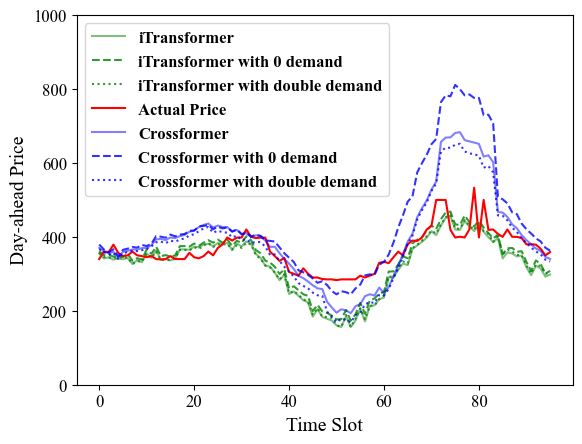

In [47]:
iTransformer_org_data = df_pred[df_pred.index == '2024-01-15']
# iTransformer_data_ab = df_pred_ab[df_pred_ab.index == '2024-01-15']
# iTransformer_data_ch = df_pred_ch[df_pred_ch.index == '2024-01-15']
iTransformer_data_gz = df_pred_gz[df_pred_gz.index == '2024-01-15']
iTransformer_data_dd = df_pred_dd[df_pred_dd.index == '2024-01-15']
true_data = df_true[df_true.index == '2024-01-15']
crossformer_data = df_pred1[df_pred1.index == '2024-01-15']
# crossformer_data_ab = df_pred1_ab[df_pred1_ab.index == '2024-01-15']
# crossformer_data_ch = df_pred1_ch[df_pred1_ch.index == '2024-01-15']
crossformer_data_gz = df_pred1_gz[df_pred1_gz.index == '2024-01-15']
crossformer_data_dd = df_pred1_dd[df_pred1_dd.index == '2024-01-15']
# plt.cla()
# # plt.xlim(0,1)
# plt.ylim(0,1000)
# plt.xlabel('Time Slot')
# plt.ylabel('Day-ahead Price')
# plt.plot(iTransformer_org_data.values.squeeze(), label='iTransformer', color='green', alpha=0.5)
# # plt.plot(iTransformer_data_ab.values.squeeze(), label='iTransformer_ab', color='green', linestyle='dotted', alpha=0.8)
# plt.plot(iTransformer_data_gz.values.squeeze(), label='iTransformer with 0 demand', color='green', linestyle='dashed', alpha=0.8)
# # plt.plot(iTransformer_data_ch.values.squeeze(), label='iTransformer_ch', color='green', linestyle='dashed', alpha=0.8)
# plt.plot(true_data.values.squeeze(), label='True', color ='red')
# plt.plot(crossformer_data.values.squeeze(), label='Crossformer', color='blue', alpha=0.5)
# plt.plot(crossformer_data_gz.values.squeeze(), label='Crossformer with 0 demand', color='blue', linestyle='dashed', alpha=0.8)

# # plt.plot(CoPiLinear_data, label='CoPiLinear')
# plt.legend()
# plt.savefig('time_invariance2.png', dpi=1200)
# plt.show()

# Clear the current figure
plt.cla()

# Set the limits for the y-axis
plt.ylim(0, 1000)

# Set the labels for the x and y axes with Times New Roman font
plt.xlabel('Time Slot', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Day-ahead Price', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})

# Set the font for the tick labels
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')

# Plot the data with custom labels and styles
plt.plot(iTransformer_org_data.values.squeeze(), label='iTransformer', color='green', alpha=0.5)
plt.plot(iTransformer_data_gz.values.squeeze(), label='iTransformer with 0 demand', color='green', linestyle='dashed', alpha=0.8)
plt.plot(iTransformer_data_dd.values.squeeze(), label='iTransformer with double demand', color='green', linestyle='dotted', alpha=0.8)
plt.plot(true_data.values.squeeze(), label='Actual Price', color='red')
plt.plot(crossformer_data.values.squeeze(), label='Crossformer', color='blue', alpha=0.5)
plt.plot(crossformer_data_gz.values.squeeze(), label='Crossformer with 0 demand', color='blue', linestyle='dashed', alpha=0.8)
plt.plot(crossformer_data_dd.values.squeeze(), label='Crossformer with double demand', color='blue', linestyle='dotted', alpha=0.8)

# Customize the legend with Times New Roman font
plt.legend(fontsize=14, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})

# Save the figure as a PDF
plt.savefig('E:\day-ahead price\Document\Document/shortcoming1.pdf', dpi=1200)

# Show the plot
plt.show()


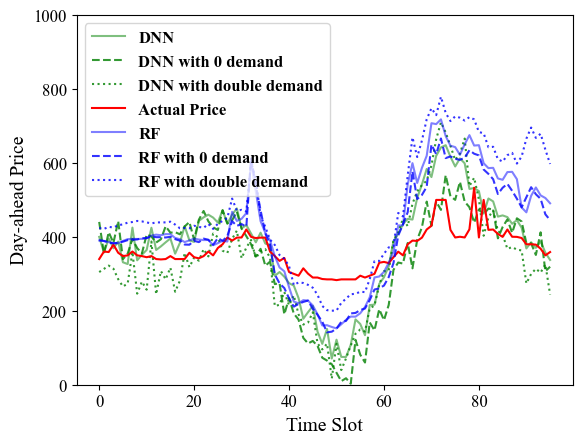

In [48]:
DNN_data = df_pred2[df_pred2.index == '2024-01-15']
DNN_data_gz = df_pred2_gz[df_pred2_gz.index == '2024-01-15']
DNN_data_dd = df_pred2_dd[df_pred2_dd.index == '2024-01-15']
true_data = df_true[df_true.index == '2024-01-15']
RF_data = df_pred3[df_pred3['Date'].dt.date == pd.to_datetime('2024-01-15').date()]['pred'].iloc[0]
RF_data_gz = df_pred3_gz[df_pred3_gz['Date'].dt.date == pd.to_datetime('2024-01-15').date()]['pred'].iloc[0]
RF_data_dd = df_pred3_dd[df_pred3_dd['Date'].dt.date == pd.to_datetime('2024-01-15').date()]['pred'].iloc[0]
RF_data = RF_data.replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
RF_data = [i for i in RF_data if i != '']
RF_data = [float(i) for i in RF_data]
RF_data = np.array(RF_data).reshape(-1)
RF_data_gz = RF_data_gz.replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
RF_data_gz = [i for i in RF_data_gz if i != '']
RF_data_gz = [float(i) for i in RF_data_gz]
RF_data_gz = np.array(RF_data_gz).reshape(-1)
RF_data_dd = RF_data_dd.replace('\n', '').replace('[', '').replace(']', '').replace('  ', ' ').split(' ')
RF_data_dd = [i for i in RF_data_dd if i != '']
RF_data_dd = [float(i) for i in RF_data_dd]
RF_data_dd = np.array(RF_data_dd).reshape(-1)

# Clear the current figure
plt.cla()

# Set the limits for the y-axis
plt.ylim(0, 1000)

# Set the labels for the x and y axes with Times New Roman font
plt.xlabel('Time Slot', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})
plt.ylabel('Day-ahead Price', fontdict={'fontsize': 14, 'fontname': 'Times New Roman'})

# Set the font for the tick labels
plt.xticks(fontsize=12, fontname='Times New Roman')
plt.yticks(fontsize=12, fontname='Times New Roman')

# Plot the data with custom labels and styles
plt.plot(DNN_data.values.squeeze(), label='DNN', color='green', alpha=0.5)
plt.plot(DNN_data_gz.values.squeeze(), label='DNN with 0 demand', color='green', linestyle='dashed', alpha=0.8)
plt.plot(DNN_data_dd.values.squeeze(), label='DNN with double demand', color='green', linestyle='dotted', alpha=0.8)
plt.plot(true_data.values.squeeze(), label='Actual Price', color ='red')
plt.plot(RF_data, label='RF', color='blue', alpha=0.5)
plt.plot(RF_data_gz, label='RF with 0 demand', color='blue', linestyle='dashed', alpha=0.8)
plt.plot(RF_data_dd, label='RF with double demand', color='blue', linestyle='dotted', alpha=0.8)

# Customize the legend with Times New Roman font
legend = plt.legend(loc='upper left')
legend.get_frame().set_alpha(0.5)  # 设置图例框的透明度
plt.legend(fontsize=12, prop={'size': 12, 'weight': 'bold', 'family': 'Times New Roman'})

# Save the figure as a PDF
plt.savefig('E:\day-ahead price\Document\Document/shortcoming2.pdf', dpi=1200)

plt.show()